In [1]:
import torch
from torch_harmonics import DiscreteContinuousConvS2
import matplotlib.pyplot as plt
import xarray as xr
from torch_harmonics.quadrature import _precompute_grid, _precompute_latitudes, _precompute_longitudes
import cartopy.crs as ccrs
import numpy as np

In [ ]:
nlat, nlon = 90, 180
kernel_shape = 3
# possible basis types are 'morlet', 'piecewise linear', and 'zernike'
basis_type = 'morlet'

lats, w = _precompute_latitudes(nlat, grid='equiangular')
lons = _precompute_longitudes(nlon)

In [ ]:
layer = DiscreteContinuousConvS2(
    in_channels=1,
    out_channels=1,
    in_shape=(nlat,nlon),
    out_shape=(nlat,nlon),
    kernel_shape=kernel_shape,
    basis_type=basis_type,
    theta_cutoff=torch.pi/4
)
# Change kernel_shape to keep num filters under 10 for computational speed
print(f'num filters = {layer.psi.to_dense()[:,0].shape[0]}')

num filters = 9


In [35]:
da = xr.DataArray(
    layer.psi.to_dense()[:,0].reshape(-1,nlat,nlon),
    coords={'filter':np.arange(0,layer.psi.to_dense()[:,0].shape[0],1), 'lat':lats*180/torch.pi-90, 'lon':lons*180/torch.pi},
    dims=('filter','lat','lon'),
    name='v'
)

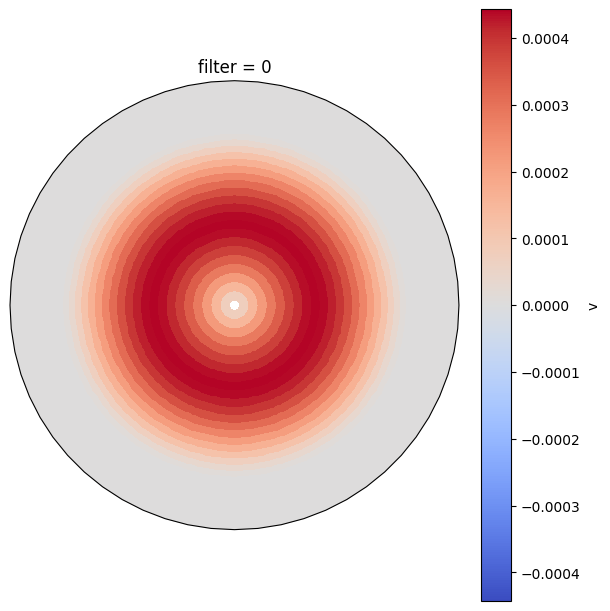

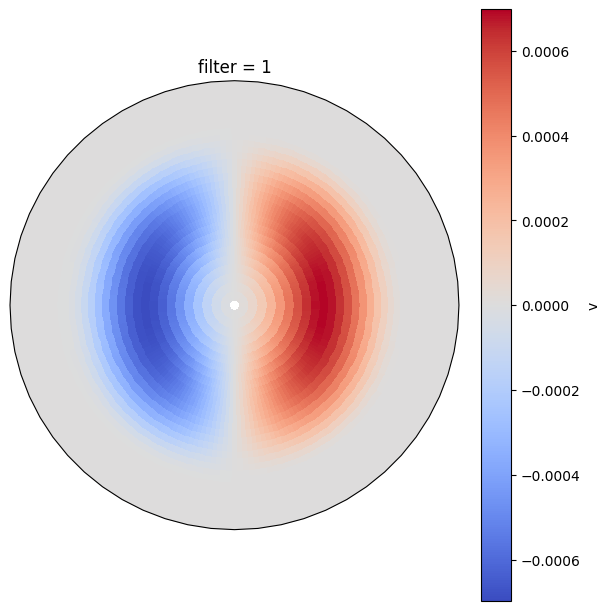

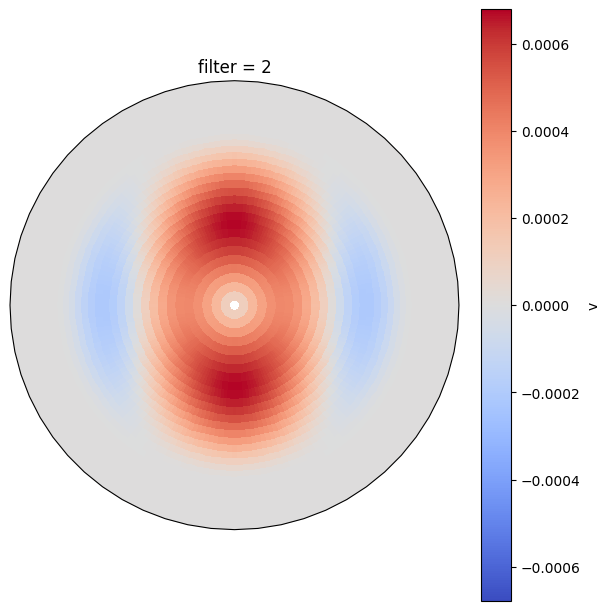

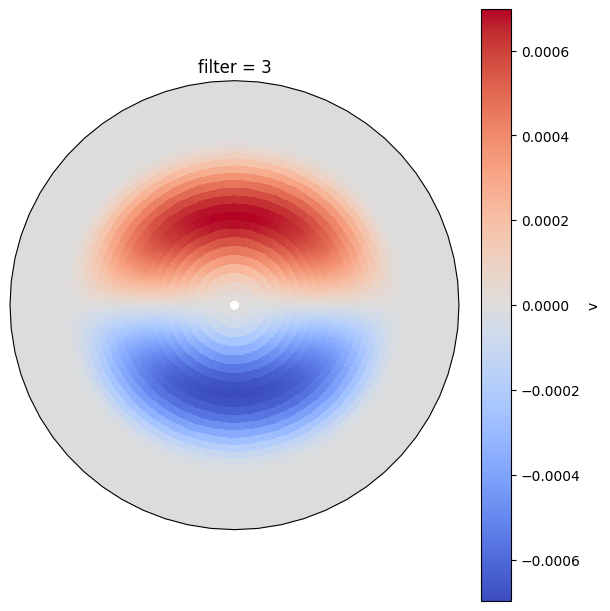

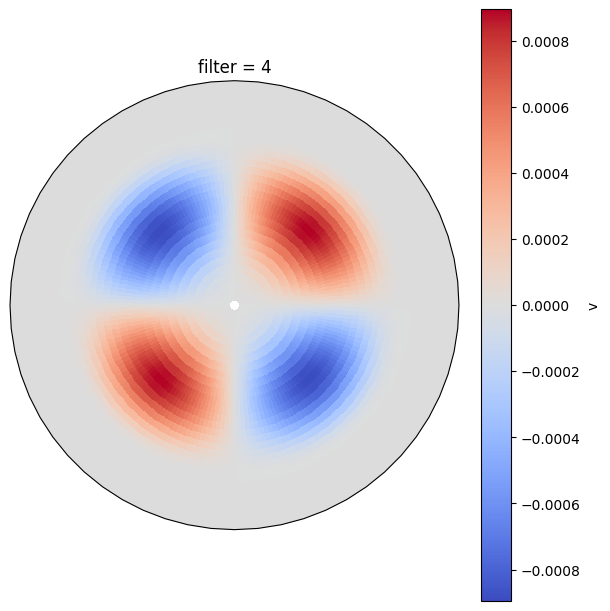

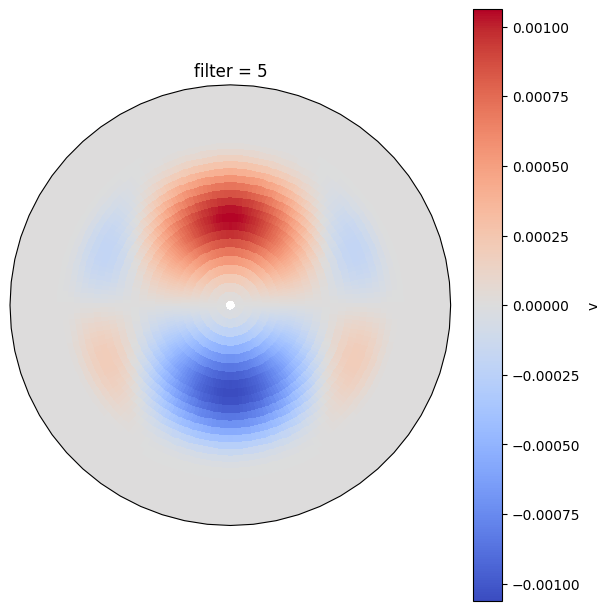

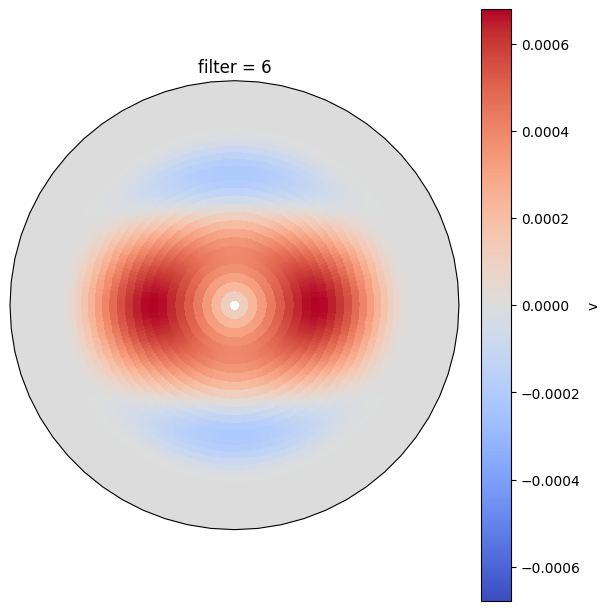

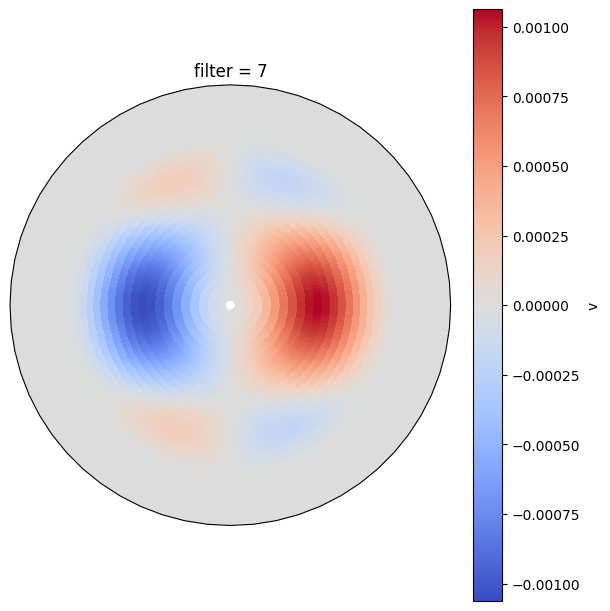

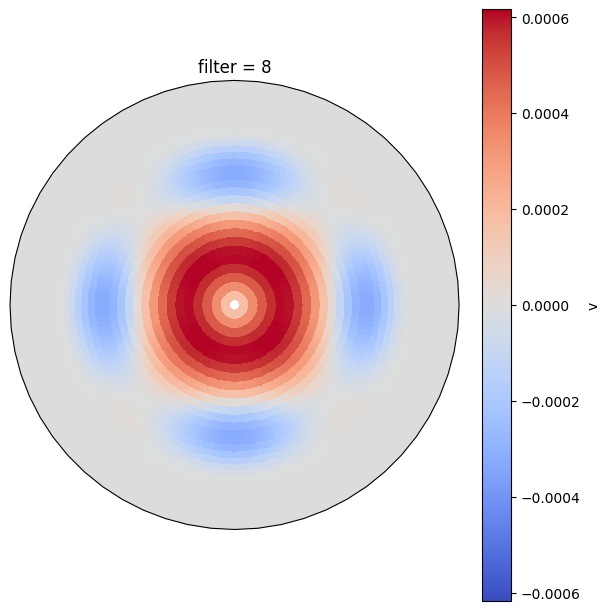

In [36]:
for i in da.filter:
    fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.NearsidePerspective(central_latitude=-90)}, figsize=(6,6), constrained_layout=True)
    to_plot = da.isel(filter=i)
    vmin = np.min(to_plot)
    vmax = np.max(to_plot)
    if np.abs(vmax) > np.abs(vmin):
        vmin = -vmax
    else:
        vmax = -vmin
    to_plot.plot(ax=axes, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=vmin, vmax=vmax)
    plt.show()
